In [615]:
import matplotlib.pyplot as plt
import numpy as np

In [616]:
C = np.sin(np.linspace(1,5,80))*5
NC = C + .5 * np.random.randn(80)

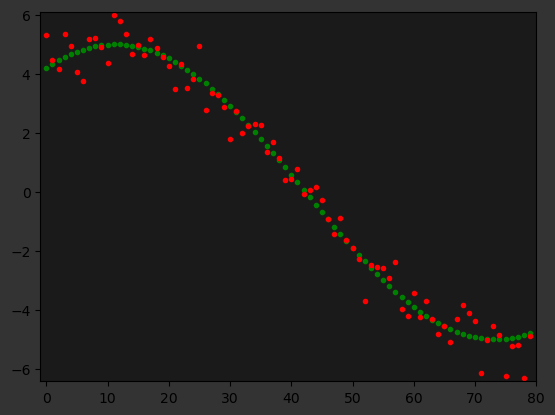

In [617]:
plt.figure(facecolor='0.2')
plt.axes().set_facecolor('0.1')
plt.axis([-1,len(NC),min(NC)-0.1,max(NC)+0.1])
plt.plot(C, 'g.', NC, 'r.')
plt.show()

In [618]:
def movAvg(a,n):
    r = a.copy()
    for i in range(1, n):
        r += np.concatenate((r[:i] / i , a[:-i]))
    return r / n

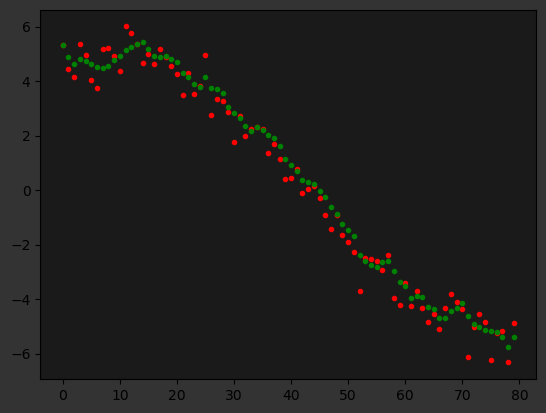

In [619]:
plt.figure(facecolor='0.2')
plt.axes().set_facecolor('0.1')
plt.plot(NC, 'r.', movAvg(NC,4),'g.')
plt.show()

In [620]:
r1 = np.array([1,2,3,4,5,6,7,8])
r2 = np.concatenate((r[:2], r[:-2]))
len(r1), len(r2), len(r[:1]) + len(r[:-1])

(8, 8, 8)

In [621]:
movAvg(NC,4)[5], NC[2:6].sum() / 4, np.mean(NC[2:6]) #interpretation of movAvg

(4.625294172776892, 4.625294172776892, 4.625294172776892)

-----

In [622]:
#to use pandas method for moving avg your data format has to be pd.Series
import pandas as pd
p_data = pd.Series(NC) 

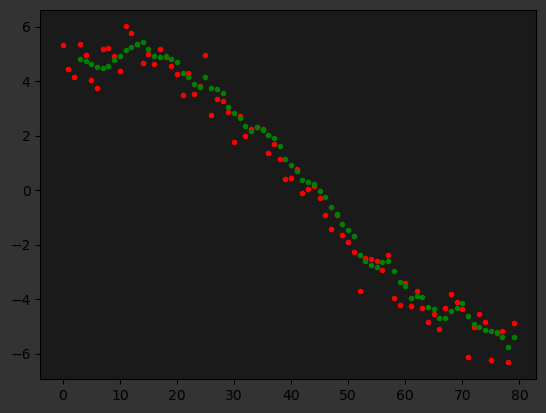

In [623]:
plt.figure(facecolor='0.2')
plt.axes().set_facecolor('0.1')
plt.plot(NC, 'r.', p_data.rolling(window=4).mean(),'g.')
plt.show()

In [624]:
p2 = p_data.rolling(window=8).mean() 
p_data[:8].sum() / 8, p2[7] #basically it does the same as movAvg

(4.649536287593058, 4.649536287593057)

In [625]:
p2[:10] #But notice

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
5         NaN
6         NaN
7    4.649536
8    4.635937
9    4.693902
dtype: float64

In [626]:
#and to fix it
p2[:8] = np.array([(NC[:i+1].sum() / (i+1)) for i in range(8)])
p2[:10]

0    5.327125
1    4.891692
2    4.643585
3    4.820630
4    4.844874
5    4.714093
6    4.575915
7    4.649536
8    4.635937
9    4.693902
dtype: float64

In [627]:
movAvg(NC,8)[:10], p2[:10]

(array([5.32712527, 4.89169185, 4.64358511, 4.82062959, 4.84487358,
        4.7140934 , 4.5759154 , 4.64953629, 4.63593686, 4.69390228]),
 0    5.327125
 1    4.891692
 2    4.643585
 3    4.820630
 4    4.844874
 5    4.714093
 6    4.575915
 7    4.649536
 8    4.635937
 9    4.693902
 dtype: float64)